In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.python.keras import layers
from tensorflow.python.keras import Sequential

In [2]:
import pathlib
data_dir= "C:\\Users\\natlq\\Downloads\\flower_photos\\flower_photos"
data_dir = pathlib.Path(data_dir)

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [4]:
print(list(data_dir.glob('*/*.jpg')))

[WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/102841525_bd6628ae3c.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/1031799732_e7f4008c03.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/10391248763_1d16681106_n.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/10437754174_22ec990b77_m.jpg'), WindowsPath('C:/Users/natlq/Downloads/flower_photos/flower_photos/daisy/1043

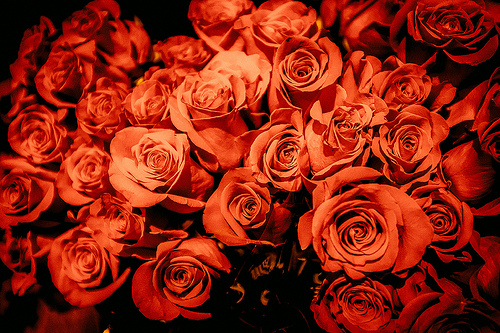

In [5]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[2]))

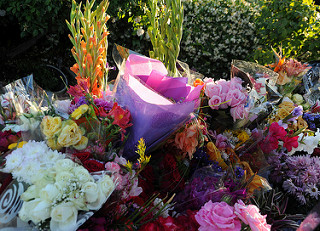

In [6]:
PIL.Image.open(str(roses[3]))

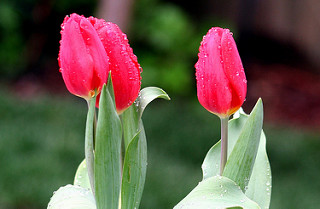

In [7]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

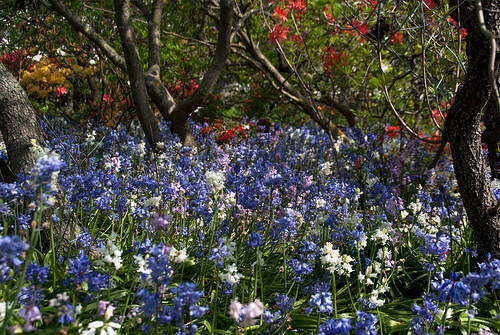

In [8]:
PIL.Image.open(str(tulips[1]))

In [9]:
batch_size = 32
img_height = 180
img_width =180

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


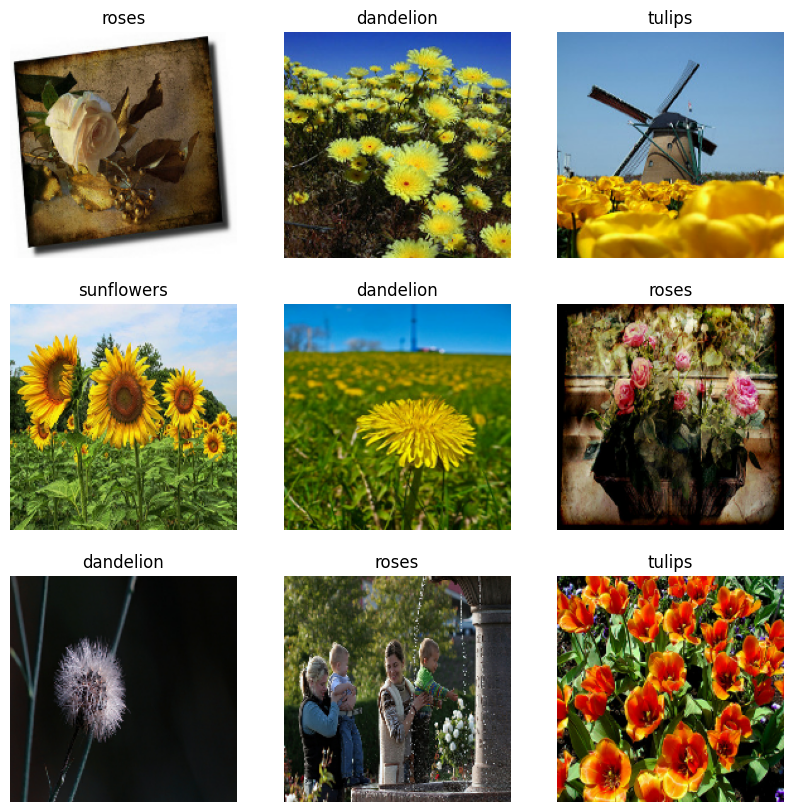

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [14]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds  = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [17]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0008662854 0.9806694


In [18]:
num_classes = len(class_names)

model = Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 21s 223ms/step - loss: 1.3491 - accuracy: 0.3951 - val_loss: 1.1013 - val_accuracy: 0.5490
Epoch 2/10
92/92 [==============================] - 21s 227ms/step - loss: 1.0239 - accuracy: 0.5926 - val_loss: 0.9664 - val_accuracy: 0.6076
Epoch 3/10
92/92 [==============================] - 21s 229ms/step - loss: 0.8392 - accuracy: 0.6659 - val_loss: 0.9165 - val_accuracy: 0.6485
Epoch 4/10
92/92 [==============================] - 21s 223ms/step - loss: 0.6346 - accuracy: 0.7660 - val_loss: 0.8800 - val_accuracy: 0.6771
Epoch 5/10
92/92 [==============================] - 21s 225ms/step - loss: 0.4379 - accuracy: 0.8372 - val_loss: 0.8731 - val_accuracy: 0.6580
Epoch 6/10
92/92 [==============================] - 22s 235ms/step - loss: 0.2418 - accuracy: 0.9159 - val_loss: 1.1842 - val_accuracy: 0.6757
Epoch 7/10
92/92 [==============================] - 23s 248ms/step - loss: 0.0973 - accuracy: 0.9721 - val_loss: 1.3857 - val_accuracy: 0.6771

In [21]:
# model.fit()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

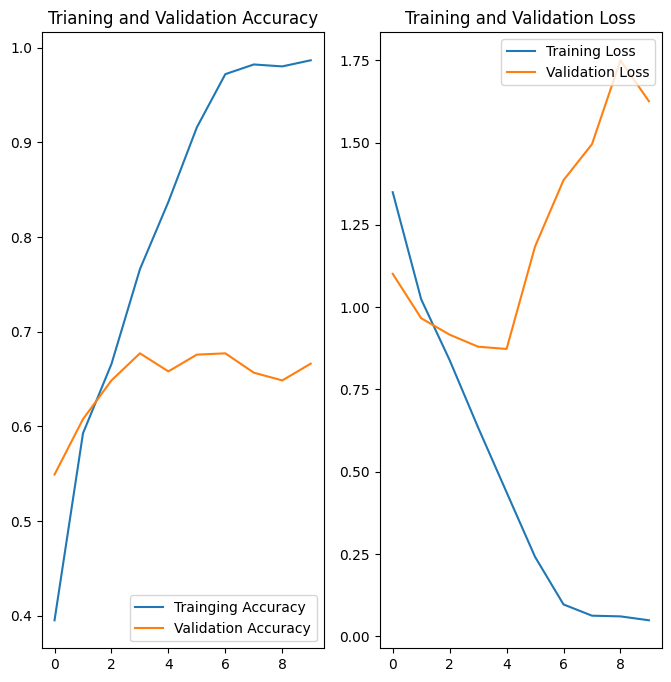

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = "Trainging Accuracy")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc='lower right')
plt.title('Trianing and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
data_augmentation = Sequential(
    [
    tf.keras.layers.RandomFlip("horizontal",
                               input_shape=(img_height,
                                            img_width,
                                            3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),                                        
    ]
)

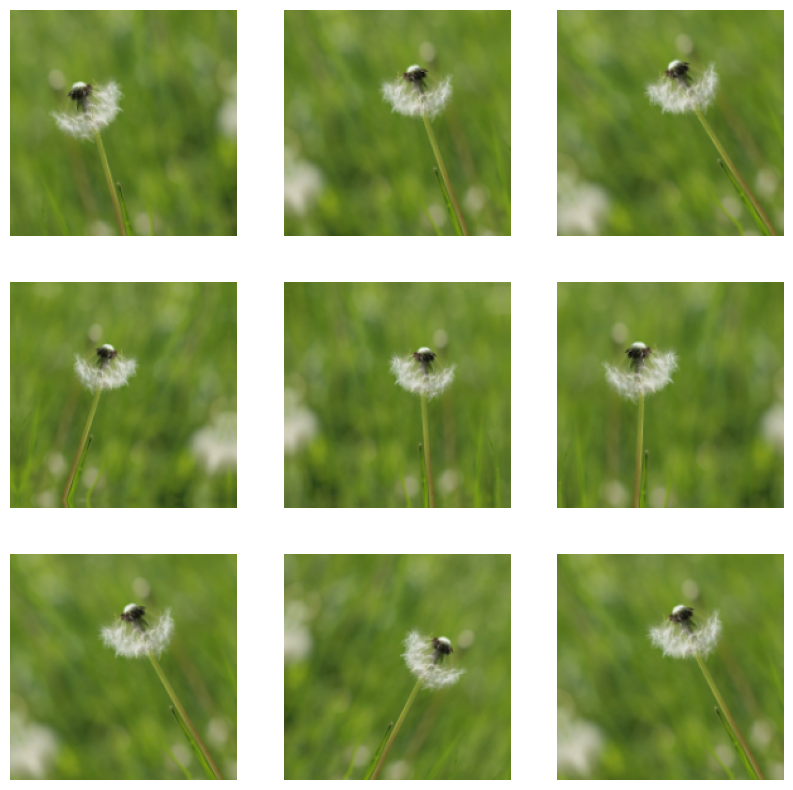

In [24]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmentation_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmentation_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [25]:
model = Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, name="outputs")
])


In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 25s 258ms/step - loss: 1.3400 - accuracy: 0.4094 - val_loss: 1.1079 - val_accuracy: 0.5327
Epoch 2/15
92/92 [==============================] - 24s 258ms/step - loss: 1.0822 - accuracy: 0.5596 - val_loss: 1.0663 - val_accuracy: 0.5763
Epoch 3/15
92/92 [==============================] - 24s 256ms/step - loss: 0.9654 - accuracy: 0.6267 - val_loss: 0.9131 - val_accuracy: 0.6580
Epoch 4/15
92/92 [==============================] - 24s 256ms/step - loss: 0.8856 - accuracy: 0.6597 - val_loss: 0.9457 - val_accuracy: 0.6294
Epoch 5/15
92/92 [==============================] - 25s 272ms/step - loss: 0.8473 - accuracy: 0.6832 - val_loss: 0.8537 - val_accuracy: 0.6744
Epoch 6/15
92/92 [==============================] - 24s 260ms/step - loss: 0.7836 - accuracy: 0.7132 - val_loss: 0.7862 - val_accuracy: 0.6894
Epoch 7/15
92/92 [==============================] - 24s 265ms/step - loss: 0.7358 - accuracy: 0.7180 - val_loss: 0.8196 - val_accuracy: 0.6621

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

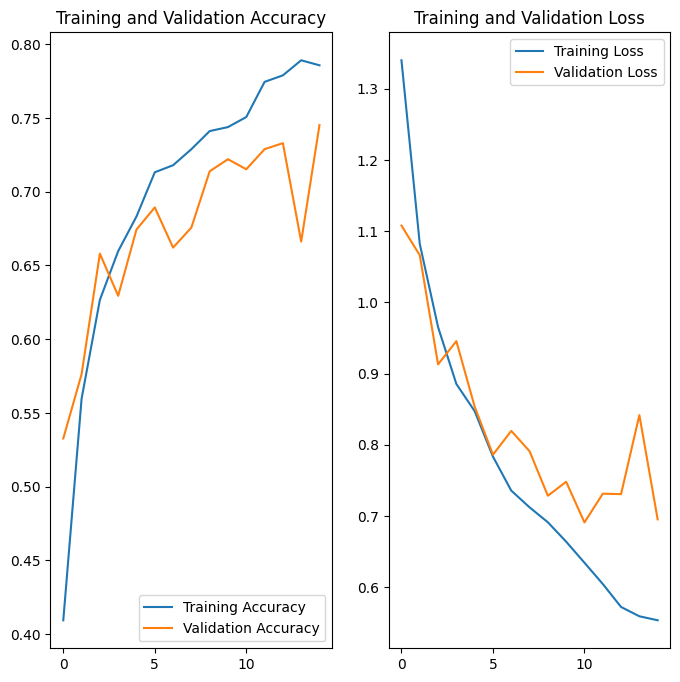

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
# sunflower_path = "C:\\Users\\natlq\\Pictures\\tulips.jpg"
sunflower_path = "C:\\Users\\natlq\\Downloads\\wavespring\\NG\\254325.jpg"
img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
image_array = np.expand_dims(img_array, axis=0)
print(image_array)
print(img_array.size)
print(image_array.size)


[[[[  5.   5.   5.]
   [  7.   7.   7.]
   [  5.   5.   5.]
   ...
   [ 30.  30.  30.]
   [ 19.  19.  19.]
   [ 17.  17.  17.]]

  [[  6.   6.   6.]
   [  6.   6.   6.]
   [  6.   6.   6.]
   ...
   [ 24.  24.  24.]
   [ 13.  13.  13.]
   [ 19.  19.  19.]]

  [[  6.   6.   6.]
   [  3.   3.   3.]
   [  7.   7.   7.]
   ...
   [ 36.  36.  36.]
   [ 17.  17.  17.]
   [ 17.  17.  17.]]

  ...

  [[ 25.  25.  25.]
   [ 24.  24.  24.]
   [ 24.  24.  24.]
   ...
   [135. 135. 135.]
   [120. 120. 120.]
   [ 98.  98.  98.]]

  [[ 29.  29.  29.]
   [ 24.  24.  24.]
   [ 24.  24.  24.]
   ...
   [117. 117. 117.]
   [106. 106. 106.]
   [105. 105. 105.]]

  [[ 25.  25.  25.]
   [ 25.  25.  25.]
   [ 23.  23.  23.]
   ...
   [ 94.  94.  94.]
   [ 84.  84.  84.]
   [101. 101. 101.]]]]
97200
97200


In [31]:

predictions = model.predict(image_array)
score = tf.nn.softmax(predictions[0])

print(
    "This iamge most likely belongs to {} with a {:.2f} precent confidence."
    .format(class_names[np.argmax(score)], 100* np.max(score))
)

This iamge most likely belongs to tulips with a 99.50 precent confidence.


In [32]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\natlq\AppData\Local\Temp\tmp8uvlr0fr\assets


INFO:tensorflow:Assets written to: C:\Users\natlq\AppData\Local\Temp\tmp8uvlr0fr\assets


In [33]:
TF_MODEL_FILE_PATH = 'model.tflite'
interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [34]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_1_input'], 'outputs': ['outputs']}}

In [35]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [36]:
predictions_lite = classify_lite(sequential_1_input = image_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [37]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100* np.max(score_lite))
)

This image most likely belongs to tulips with a 99.50 percent confidence.


In [38]:
print(np.max(np.abs(predictions - predictions_lite)))

4.7683716e-06
